<div align="center"><h1> Projet Data Science </h1></div>
<div align="center"><h2> Classification d'assertions selon leur valeurs de véracité ( automatic fact-checking ) </h2></div>

<div class="alert alert-block alert-info" align="center">
    <h1>
        Imports
    </h1>
</div>

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings

from enum import Enum
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore", category = FutureWarning)

<div class="alert alert-block alert-info" align="center">
    <h1>
        Loading the dataset
    </h1>
</div>

In [2]:
labels = ["ID", "ClaimReviewAuthor", "ClaimReviewAuthorName", "ClaimReviewAuthorURL",
          "ClaimReviewClaimReviewed", "ClaimReviewDatePublished", "ClaimReviewSource", "ClaimReviewURL",
          "CreativeWorkAuthorName", "CreativeWorkAuthorSameAs", "CreativeWorkDatePublished", "ExtraBody",
          "ExtraEntitiesAuthor", "ExtraEntitiesBody", "ExtraEntitiesClaimReviewClaimReviewed", "ExtraEntitiesKeywords",
          "ExtraReferedLinks", "ExtraTags", "ExtraTitle", "RatingAlternateName",
          "RatingBestRating", "RatingRatingValue", "RatingWorstRating"]

labelsClaimsKG = ["ID", "Text", "Date", "TruthRating", "RatingName", "Author", "Headline",
                  "NamedEntitiesClaim", "NamedEntitiesArticle", "Keywords", "Source", "SourceURL", "Link", "Language"]

df = pd.read_csv('datasets/ClaimsKG.csv', sep = ',', names = labelsClaimsKG, skiprows = 1)

<div class="alert alert-block alert-info" align="center">
    <h1>
        Printing informations
    </h1>
</div>

## Shape

In [3]:
print(f'Shape :\n{df.shape}')

Shape :
(10000, 14)


## Informations

In [4]:
print(f'Informations :')
df.info()

Informations :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
ID                      10000 non-null object
Text                    10000 non-null object
Date                    10000 non-null object
TruthRating             10000 non-null int64
RatingName              10000 non-null object
Author                  10000 non-null object
Headline                9882 non-null object
NamedEntitiesClaim      9864 non-null object
NamedEntitiesArticle    6497 non-null object
Keywords                8691 non-null object
Source                  10000 non-null object
SourceURL               10000 non-null object
Link                    10000 non-null object
Language                10000 non-null object
dtypes: int64(1), object(13)
memory usage: 1.1+ MB


## Description

In [5]:
print(f'Description :')
display(df.describe())

Description :


,TruthRating
count,10000.000000
mean,1.237900
std,1.226154
min,-1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


## Printing some lines

In [6]:
print(f'Printing some lines :')
display(df.sample(5))

Printing some lines :


,ID,Text,Date,TruthRating,RatingName,Author,Headline,NamedEntitiesClaim,NamedEntitiesArticle,Keywords,Source,SourceURL,Link,Language
2405,http://data.gesis.org/claimskg/claim_review/96...,'Jeff Greene can buy anything' ... he owns tw...,2010-07-29,3,TRUE,Kendrick Meek,What you see is what you get - Kendrick Meek h...,"Belize,Jeff Greene,Kendrick Meek,Palazzo di Am...",Jeff Greene,"Candidate Biography,Elections,Message Machine ...",politifact,http://www.politifact.com,http://www.politifact.com/florida/statements/2...,English
8533,http://data.gesis.org/claimskg/claim_review/ae...,Says Democratic challenger Gina Ortiz Jones ha...,2018-08-18,1,FALSE,Will Hurd,Will Hurd way off on foe getting more money fr...,"ActBlue,Center for Responsive Politics,Federal...","Gina Ortiz Jones,Texas","Campaign Finance,States",politifact,http://www.politifact.com,http://www.politifact.com/texas/statements/201...,English
7069,http://data.gesis.org/claimskg/claim_review/d2...,Austin’s Pease Elementary 'is a school that wa...,2011-04-01,1,FALSE,Meria Carstarphen,Austin's school superintendent says Pease Elem...,"Austin College,Elisha M. Pease,KUT-FM,Mirabeau...",Texas Constitution,Education,politifact,http://www.politifact.com,http://www.politifact.com/texas/statements/201...,English
340,http://data.gesis.org/claimskg/claim_review/32...,Notorious criminal Charles Manson has endorsed...,Unknown,1,FALSE,Unknown,Charles Manson Endorses Trump,"CHARLES MANSON,Charles Manson,DONALD TRUMP,Don...","Charles Manson,Donald Trump","charles manson, donald trump, news generator s...",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/charles-mans...,English
9416,http://data.gesis.org/claimskg/claim_review/aa...,Players whose photos grace cans of Campbell’s ...,Unknown,1,FALSE,Unknown,Chunky Soup Curse,"Adweek,CNN Sports Illustrated,Chicago Sun-Time...",NaN,"ASP Article, football",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/souperstitio...,English


## Affichage d'informations sur toutes les colonnes

In [7]:
for column in df.columns:
      print(f'Nombre de valeurs nulles pour {column} :\n{df[column].isnull().value_counts()}\n')

Nombre de valeurs nulles pour ID :
False    10000
Name: ID, dtype: int64

Nombre de valeurs nulles pour Text :
False    10000
Name: Text, dtype: int64

Nombre de valeurs nulles pour Date :
False    10000
Name: Date, dtype: int64

Nombre de valeurs nulles pour TruthRating :
False    10000
Name: TruthRating, dtype: int64

Nombre de valeurs nulles pour RatingName :
False    10000
Name: RatingName, dtype: int64

Nombre de valeurs nulles pour Author :
False    10000
Name: Author, dtype: int64

Nombre de valeurs nulles pour Headline :
False    9882
True      118
Name: Headline, dtype: int64

Nombre de valeurs nulles pour NamedEntitiesClaim :
False    9864
True      136
Name: NamedEntitiesClaim, dtype: int64

Nombre de valeurs nulles pour NamedEntitiesArticle :
False    6497
True     3503
Name: NamedEntitiesArticle, dtype: int64

Nombre de valeurs nulles pour Keywords :
False    8691
True     1309
Name: Keywords, dtype: int64

Nombre de valeurs nulles pour Source :
False    10000
Name: Source

## Affichage des colonnes vides

In [8]:
array = []
for column in df.columns:
    value = False
    value = df[column].isnull().any()
    if value:
        array.append(column)
print(f'Nombre de colonnes vides : {len(array)}\nLes colonnes vide sont :\n{array}')

Nombre de colonnes vides : 4
Les colonnes vide sont :
['Headline', 'NamedEntitiesClaim', 'NamedEntitiesArticle', 'Keywords']


## Get a series of unique values in each column of the dataframe

In [9]:
for column in df.columns:
    uniqueValues = df[column].unique()
    print(f'Number of unique elements in column {column} : {len(uniqueValues)}, values & type :\n{uniqueValues}\n')

Number of unique elements in column ID : 9944, values & type :
['http://data.gesis.org/claimskg/claim_review/becd1657-d104-5a3e-94de-61f26b8e3f6e'
 'http://data.gesis.org/claimskg/claim_review/8a8a0f17-b1ec-5f86-8ad4-4bb0f1dd5cf5'
 'http://data.gesis.org/claimskg/claim_review/c215a999-c7cf-5c9f-bada-bcddfccd9a56'
 ...
 'http://data.gesis.org/claimskg/claim_review/0e921f02-25e3-5ec7-873d-dfefae8e0cb1'
 'http://data.gesis.org/claimskg/claim_review/c94a3d9f-9758-5b90-8211-c381cbadcef8'
 'http://data.gesis.org/claimskg/claim_review/d1e3a15c-9bcb-5026-97c1-dc5b14c8c16d']

Number of unique elements in column Text : 9977, values & type :
['Malia Obama cashed a $1.2 million tax refund check.'
 'High diver is saved from jumping into a drained pool when he casts a cross-like shadow on the wall.'
 "'And the revenue generated by drilling off Virginia’s coast? $40 million over 10 years.'"
 ...
 "'Trump Management was charged with discriminating against African-Americans and breaking federal law.'"


## Affichage du nombre des différents TruthRating

In [10]:
print(f'La colonne TruthRating contient :')
print(f'{df[df["TruthRating"]==-1]["ID"].count()} Other')
print(f'{df[df["TruthRating"]==1]["ID"].count()} False')
print(f'{df[df["TruthRating"]==2]["ID"].count()} Mixture')
print(f'{df[df["TruthRating"]==3]["ID"].count()} True')

La colonne TruthRating contient :
1761 Other
3665 False
3247 Mixture
1327 True


<div class="alert alert-block alert-info" align="center">
    <h1>
        Visualization
    </h1>
</div>

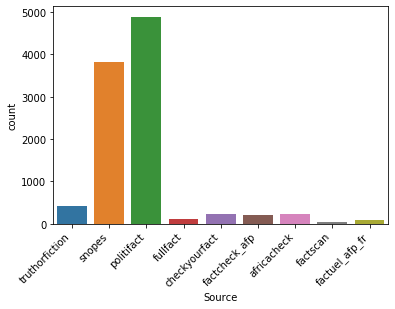

In [11]:
chart = sns.countplot(x = 'Source', data = df)
plt.setp(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

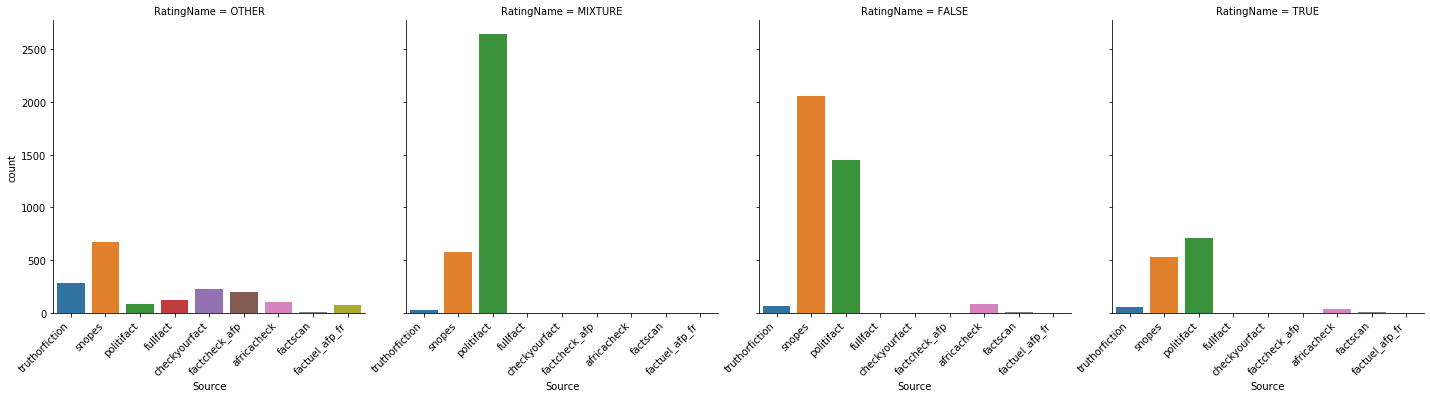

In [12]:
chart = sns.catplot(x = 'Source', col = 'RatingName', kind = 'count', data = df)
for ax in chart.axes.ravel():
    plt.setp(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

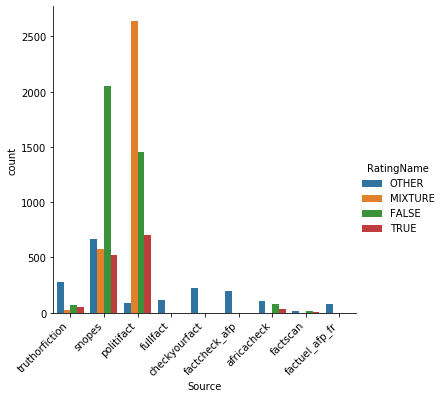

In [13]:
chart = sns.catplot('Source', data = df, hue = 'RatingName', kind = 'count')
for ax in chart.axes.ravel():
    plt.setp(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

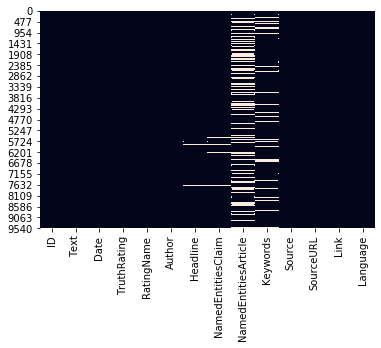

In [14]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()

<div class="alert alert-block alert-info" align="center">
    <h1>
        Mapping ratings
    </h1>
</div>

In [15]:
class NormalizedRatings(Enum):
    FALSE = 1
    MIXTURE = 2
    TRUE = 3
    OTHER = -1

_normalization_dictionary = {  # type: Dict[str, Dict[str,NormalizedRatings]]
    "politifact": {  # type: Dict[str,NormalizedRatings]
        'incorrect': NormalizedRatings.FALSE,
        'pants-fire': NormalizedRatings.FALSE,
        'pants on fire': NormalizedRatings.FALSE,
        'pants on fire!': NormalizedRatings.FALSE,
        'false': NormalizedRatings.FALSE,
        'mostly correct': NormalizedRatings.MIXTURE,
        'mostly false': NormalizedRatings.MIXTURE,
        'barely true': NormalizedRatings.MIXTURE,
        'half true': NormalizedRatings.MIXTURE,
        'half-true': NormalizedRatings.MIXTURE,
        'mostly true': NormalizedRatings.MIXTURE,
        'true': NormalizedRatings.TRUE,
        'correct': NormalizedRatings.TRUE
    },
    "snopes": {  # type: Dict[str,NormalizedRatings]
        'false': NormalizedRatings.FALSE,
        'legend': NormalizedRatings.FALSE,
        'mixture': NormalizedRatings.MIXTURE,
        'mixture:': NormalizedRatings.MIXTURE,
        'true': NormalizedRatings.TRUE,
        'mostly false': NormalizedRatings.MIXTURE,
        'mostly true': NormalizedRatings.MIXTURE,
        'partly true': NormalizedRatings.MIXTURE,
        'MIXTURE OF TRUE AND FALSE INFORMATION': NormalizedRatings.MIXTURE,
        'MIXTURE OF TRUE AND FALSE INFORMATION:': NormalizedRatings.MIXTURE,
        'MIXTURE OF ACCURATE AND  INACCURATE INFORMATION': NormalizedRatings.MIXTURE
    },
    "africacheck": {  # type: Dict[str,NormalizedRatings]
        'incorrect': NormalizedRatings.FALSE,
        'mostly-correct': NormalizedRatings.MIXTURE,
        'correct': NormalizedRatings.TRUE
    },
    "factscan": {  # type: Dict[str,NormalizedRatings]
        'false': NormalizedRatings.FALSE,
        'true': NormalizedRatings.TRUE,
        'Misleading': NormalizedRatings.OTHER
    },
    "truthorfiction": {  # type: Dict[str,NormalizedRatings]
        'fiction': NormalizedRatings.FALSE,
        'truth': NormalizedRatings.TRUE,
        'truth & fiction': NormalizedRatings.MIXTURE,
        'mostly fiction': NormalizedRatings.MIXTURE,
        'truth & misleading': NormalizedRatings.MIXTURE,
        'mostly truth': NormalizedRatings.MIXTURE
    },
    "checkyourfact": {  # type: Dict[str,NormalizedRatings]
        'False': NormalizedRatings.FALSE,
        'True': NormalizedRatings.TRUE,
        'Mostly True': NormalizedRatings.MIXTURE,
        'true/false': NormalizedRatings.MIXTURE,
        'truth & misleading': NormalizedRatings.MIXTURE,
        'mostly truth': NormalizedRatings.MIXTURE,
        'misleading': NormalizedRatings.MIXTURE
    },
    "factcheck_aap": {
        "True": NormalizedRatings.TRUE,
        "False": NormalizedRatings.FALSE,
        "Mostly True": NormalizedRatings.MIXTURE,
        "Mostly False": NormalizedRatings.MIXTURE,
        "Somewhat True": NormalizedRatings.MIXTURE,
        "Somewhat False": NormalizedRatings.MIXTURE
    },
    "factuel_afp_fr": {
        'Faux': NormalizedRatings.FALSE,
        'Totalement faux': NormalizedRatings.FALSE,
        'Démenti': NormalizedRatings.FALSE,
        "C'est une oeuvre de fiction": NormalizedRatings.FALSE,
        'Vrai': NormalizedRatings.TRUE,
        'Totalement Vrai': NormalizedRatings.TRUE,
        'Plutôt vrai': NormalizedRatings.MIXTURE,
        'Trompeur': NormalizedRatings.MIXTURE,
        'trompeur': NormalizedRatings.MIXTURE,
        'Plutôt faux': NormalizedRatings.MIXTURE,
        'Presque': NormalizedRatings.MIXTURE,
        'Mélangé': NormalizedRatings.MIXTURE,
        'Mélange': NormalizedRatings.MIXTURE,
        'Inexact': NormalizedRatings.MIXTURE,
        'Incertain': NormalizedRatings.MIXTURE,
        'Imprécis': NormalizedRatings.MIXTURE,
        'Exagéré': NormalizedRatings.MIXTURE,
        'Douteux': NormalizedRatings.MIXTURE,
    },
    "factcheck_afp": {
        'False': NormalizedRatings.FALSE,
        'Fake': NormalizedRatings.FALSE,
        'Mixed': NormalizedRatings.MIXTURE,
        'Hoax': NormalizedRatings.FALSE,
        'Falso': NormalizedRatings.FALSE,
        'APRIL FOOL': NormalizedRatings.FALSE
    },
    "fullfact": {
        'Correct': NormalizedRatings.TRUE,
        'Incorrect': NormalizedRatings.FALSE,
        'Not quite': NormalizedRatings.MIXTURE
    }
}

def _standardize_name(original_name: str):
    return original_name.strip().lower().replace("!", "").replace(":", "").replace("-", " ")

def normalize(source_name, original_name) -> NormalizedRatings:
    '''
    Generate a normalized rating from the original ratings on each respective site
    :param original_name:
    :return normalized_rating: NormalizedRating
    '''
    try:
        source = _normalization_dictionary[source_name]
        normalized_value = source[_standardize_name(original_name)]
    except KeyError:
        normalized_value = NormalizedRatings.OTHER
    return normalized_value

<div class="alert alert-block alert-info" align="center">
    <h1>
        Pre-processing
    </h1>
</div>

# First attemp of pre-processing

## Copy of the data frame

In [16]:
df1 = df.copy()

In [17]:
display(df1.sample(5))

,ID,Text,Date,TruthRating,RatingName,Author,Headline,NamedEntitiesClaim,NamedEntitiesArticle,Keywords,Source,SourceURL,Link,Language
2344,http://data.gesis.org/claimskg/claim_review/bf...,"A photograph shows Donald Trump, Muhammad Ali,...",Unknown,3,TRUE,Unknown,Did Donald Trump Receive an Ellis Island Award...,"2016 presidential campaign,Anita Bryant,Donald...","Donald Trump,Ellis Island,Ellis Island Medal o...",donald trump,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/trump-receiv...,English
8582,http://data.gesis.org/claimskg/claim_review/fc...,State budget cuts for local schools resulted i...,2011-11-15,1,FALSE,Wisconsin Education Association Council,"WEAC says state budget cuts led to nearly 4,00...","Capital Times,Marquette University,Mathiowetz,...",NaN,"Education,State Budget",politifact,http://www.politifact.com,http://www.politifact.com/wisconsin/statements...,English
6987,http://data.gesis.org/claimskg/claim_review/10...,Says the House Rules Committee is the only pan...,2010-11-05,3,TRUE,John Boehner,Transparency pledge sparks call for cameras in...,"Brian Lamb,C-SPAN,David Dreier,Democrat,House ...",House Rules Committee,"Government Efficiency,Transparency",politifact,http://www.politifact.com,http://www.politifact.com/ohio/statements/2010...,English
5790,http://data.gesis.org/claimskg/claim_review/19...,Nevada has been recently ranked No. 1 in 'unem...,2011-12-08,3,TRUE,Florida Chamber of Commerce,"Nevada is No. 1 in unemployment, divorce and v...","Adam Putnam,American Community Survey,Bureau o...",personal bankruptcy,Gambling,politifact,http://www.politifact.com,http://www.politifact.com/florida/statements/2...,English
4050,http://data.gesis.org/claimskg/claim_review/d1...,Viral Image Questions Kamala Harris’ Racial Ba...,Unknown,-1,OTHER,Unknown,Viral Image Questions Kamala Harris’ Racial Ba...,"Donald Harris,Facebook,India,Jamaica,Kamala Ha...",Kamala Harris,NaN,checkyourfact,http://checkyourfact.com,https://checkyourfact.com/2019/07/12/fact-chec...,English


## Removing columns that contain NaN

In [18]:
df1 = df1.drop(['Headline', 'NamedEntitiesClaim', 'NamedEntitiesArticle', 'Keywords'], axis = 1)

In [19]:
display(df1.sample(5))

,ID,Text,Date,TruthRating,RatingName,Author,Source,SourceURL,Link,Language
6499,http://data.gesis.org/claimskg/claim_review/6a...,A photograph shows a 'graveyard' of guitars co...,Unknown,-1,OTHER,Unknown,snopes,http://www.snopes.com,https://www.snopes.com/fact-check/guitar-grave...,English
2359,http://data.gesis.org/claimskg/claim_review/46...,The 2011 Rebuild America Jobs Act 'would have ...,2014-07-09,1,FALSE,Monica Wehby,politifact,http://www.politifact.com,http://www.politifact.com/oregon/statements/20...,English
3433,http://data.gesis.org/claimskg/claim_review/f9...,'The state budget has actually grown by $4.6 b...,2013-11-05,2,MIXTURE,Mary Burke,politifact,http://www.politifact.com,http://www.politifact.com/wisconsin/statements...,English
7117,http://data.gesis.org/claimskg/claim_review/c9...,'A married couple that' use the same last name...,2015-02-02,2,MIXTURE,Rush Limbaugh,politifact,http://www.politifact.com,http://www.politifact.com/wisconsin/statements...,English
4646,http://data.gesis.org/claimskg/claim_review/b6...,Says 'Rep. Jim Weidner proposed a bill taking ...,2010-09-30,3,TRUE,Blue Oregon,politifact,http://www.politifact.com,http://www.politifact.com/oregon/statements/20...,English


## Remove unnecessary columns

In [20]:
df1 = df1.drop(['ID', 'Date', 'TruthRating', 'SourceURL', 'Link', 'Language'], axis = 1)

In [21]:
display(df1.sample(5))

,Text,RatingName,Author,Source
9429,'No other public or private business in Americ...,MIXTURE,Sanford Bishop,politifact
8657,An independent payment advisory board created ...,FALSE,60 Plus Association,politifact
8201,Wet footprints behind the sofa prove that a te...,FALSE,Unknown,snopes
9676,President Calvin Coolidge’s son was killed by ...,FALSE,Unknown,snopes
4727,'Several elected state officials have opened t...,TRUE,Dan Patrick,politifact


## Transform categorical attributes into numeric value

In [22]:
classLabelEncoder = LabelEncoder()

df1["Text"]=classLabelEncoder.fit_transform(df1["Text"])
df1["RatingName"]=classLabelEncoder.fit_transform(df1["RatingName"])
df1["Author"]=classLabelEncoder.fit_transform(df1["Author"])
df1["Source"]=classLabelEncoder.fit_transform(df1["Source"])
# oneHotEncoder
# tf idf

In [23]:
display(df1.sample(5))

,Text,RatingName,Author,Source
320,5424,0,158,6
5898,6276,2,1898,8
4247,2526,0,1898,7
8804,6714,3,1898,8
9866,5198,1,1898,7


## Saving the transformed data

In [24]:
df1.to_csv('datasets/attemp1.csv', sep = ';', index = False)

<div class="alert alert-block alert-info" align="center">
    <h1>
        Classification
    </h1>
</div>

<div align="center">
    <h1>
        Preparing data for classification
    </h1>
</div>

## Reading the transformed data for the classification

In [25]:
df1C = pd.read_csv('datasets/attemp1.csv', sep = ';')
df1C.head()

,Text,RatingName,Author,Source
0,5663,2,1898,8
1,4955,2,1898,7
2,198,1,867,6
3,4944,1,714,6
4,8496,0,1898,7


## Define the learning variables and the variable to predict

In [26]:
array = df1C.values
X = array[:,[0,2,3]]
y = array[:,1]

## Cut the data set into a test set and a learning set

In [27]:
myTrainSize = 0.3 # 30% du jeu de données pour le test
myTestSize = 1 - myTrainSize # 70% du jeu de données pour l'entraînement
seed = 30

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = myTrainSize, random_state = seed, test_size = myTestSize)

<div align="center">
    <h1>
        Testing the first classifier
    </h1>
</div>

## GaussianNB classifier

In [28]:
clfGaussianNB = GaussianNB()

clfGaussianNB.fit(X_train, y_train)

resultGaussianNB = clfGaussianNB.predict(X_test)

print(f'accuracy : {accuracy_score(resultGaussianNB, y_test)}')

accuracy : 0.5455714285714286


## Display the confusion matrix and the classification report

In [29]:
print (f'Matrice de confusion :\n{confusion_matrix(y_test, resultGaussianNB)}')
print (f'Classification report :\n{classification_report(y_test, resultGaussianNB)}')

Matrice de confusion :
[[1512 1015   65    2]
 [ 439 1840    0    0]
 [ 689   59  464   13]
 [ 385  486   28    3]]
Classification report :
              precision    recall  f1-score   support

           0       0.50      0.58      0.54      2594
           1       0.54      0.81      0.65      2279
           2       0.83      0.38      0.52      1225
           3       0.17      0.00      0.01       902

    accuracy                           0.55      7000
   macro avg       0.51      0.44      0.43      7000
weighted avg       0.53      0.55      0.50      7000



## Cross validate with 10 splits (Kfold)

In [30]:
seed = 7
myKFold = KFold(n_splits = 10, shuffle = True, random_state = seed)

## Apply the GaussianNB classifier and give the different accuracy for the 10 evaluations

In [31]:
clfGaussianNB = GaussianNB()

myScoring = 'accuracy'

score = cross_val_score(clfGaussianNB, X, y, cv = myKFold, scoring = myScoring)

print(f'Les différentes accuracy pour les 10 évaluations sont :\n{score}')
print(f'Accuracy moyenne : {score.mean()} | Standard deviation : {score.std()}')

Les différentes accuracy pour les 10 évaluations sont :
[0.568 0.534 0.537 0.556 0.533 0.526 0.559 0.546 0.539 0.555]
Accuracy moyenne : 0.5452999999999999 | Standard deviation : 0.012930970574554711


<div align="center">
    <h1>
        Testing several classifiers
    </h1>
</div>

In [32]:
seed = 7
myScoring = 'accuracy'
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))
models.append(('RFO', RandomForestClassifier()))

In [33]:
scores = []
names = []

for name, model in models:
    myKFold = KFold(n_splits = 10, random_state = seed)
    score = cross_val_score(model, X, y, cv = myKFold, scoring = myScoring)
    scores.append(score)
    names.append(name)
    print(f'{name} : {score.mean()} | {score.std()}')

KNN : 0.4787 | 0.017652478579508312
CART : 0.47380000000000005 | 0.020865282169191958
NB : 0.5448999999999999 | 0.015552813250341538
SVM : 0.47300000000000003 | 0.016583123951776992
RFO : 0.4913 | 0.016297545827516493


## Displaying results of the different classifiers

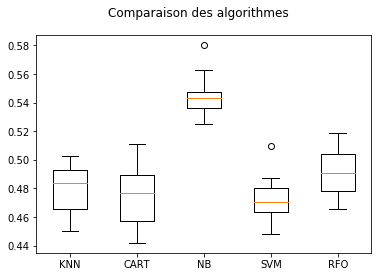

In [34]:
fig = plt.figure()
fig.suptitle('Comparaison des algorithmes')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(names)
plt.show()